# Clustering on Iris Dataset- Prediction using Unsupervised ML

Task2, Data Science and Business Analytics, Graduate Rotational Internship (GRIP), The Sparks Foundation, Batch-GRIPMARCH23

# Problem Statement

From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

Approach: The task can be solved using K-Means Clustering in the dataset.

# Author: Sanjana Bhakat

In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the dataset
iris=datasets.load_iris()
iris_df=pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# Exploring the data

After we are done with importing the libraries and loading the dataset, we apply certain statistical measures to check the distribution of the data.

In [3]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Data Visualisation

Now, we use various plots to get a visual idea of the relationship between the data.

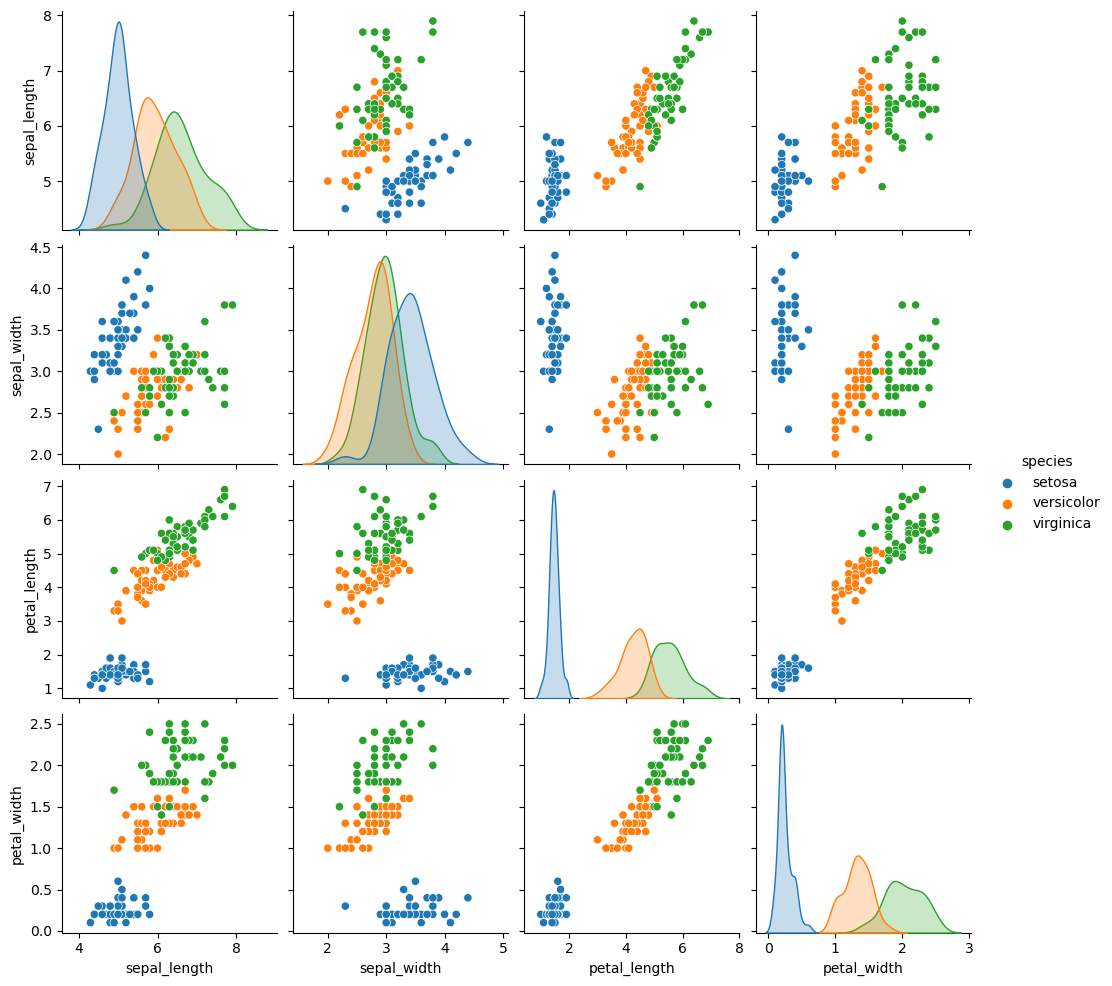

In [4]:
iris_data=sns.load_dataset('iris')
sns.pairplot(iris_data,hue="species")

As we can see, the pairplot in seaborn shows us the scatter plots and the graphs on the data based on the attributes of the species.

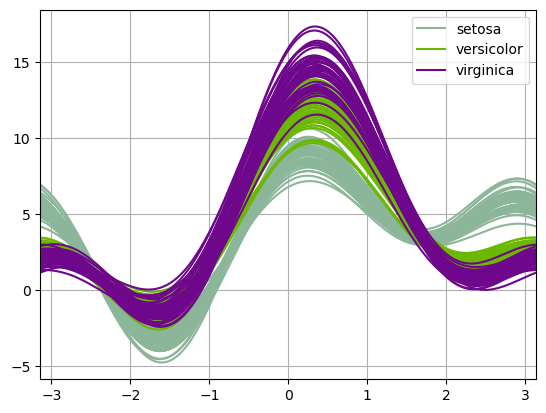

In [14]:
p=pd.plotting.andrews_curves(iris_data,"species")
p.plot()
plt.show()

In the above visual, we plot an Andrews curve to the dataset. Andrews curves are used to visualise high-dimensional data by mapping each observation into a function.

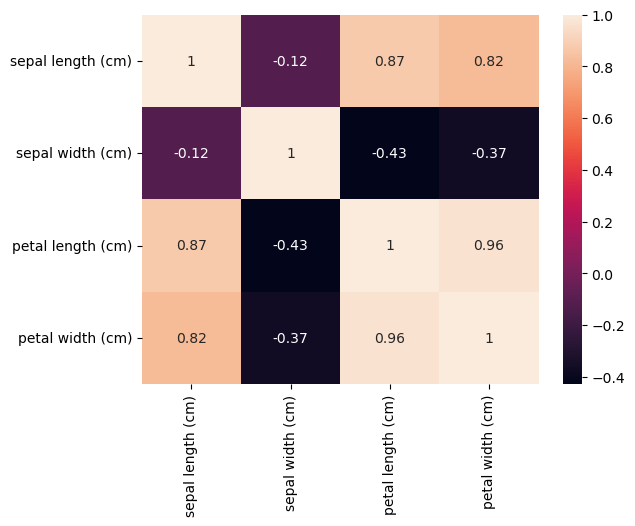

In [9]:
annot=True
hm=sns.heatmap(data=iris_df.corr(), annot=annot)
plt.show()

The above heatmap shows the statistical measure of the correlation coefficients between the various columns of the data.

# Predicting the optimal number of Clusters using the Elbow method

The elbow method plots the inertia or Within Cluster sum of squares and helps predict the value of k or the optimal number of clusters.

First, we find the numerical data frame used for calculating the inertia.

In [5]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Next, we calculate and plot the inertias.

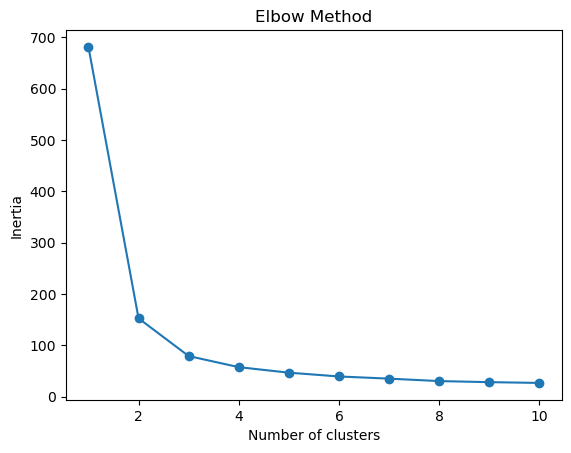

In [6]:
inertias=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(x)
    inertias.append(kmeans.inertia_)
plt.plot(range(1,11),inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


We see that the point of the X-axis where there is a sharp drop in the value of the inertia is (3,0). Hence, we choose k=3.

# Applying K-Means Clustering algorithm to identify the clusters

Now, we apply the k-means clustering algorithm to predict the clusters.

In [7]:
k_means=KMeans(n_clusters=3,init="k-means++",max_iter=300,n_init=10,random_state=0)
y_kmeans=k_means.fit_predict(x)


Now, we visualise the clusters along with the centroids.

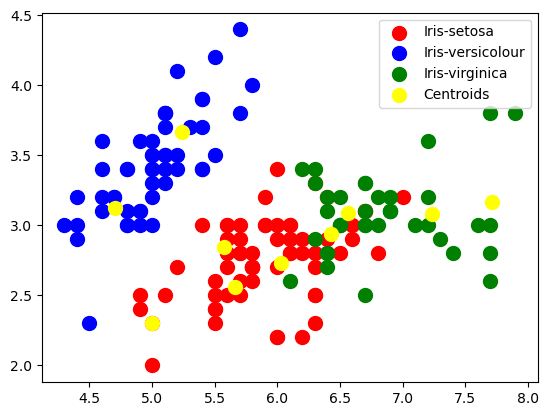

In [8]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()

# Conclusion

The main goal of K-Means Clustering is to group similar elements or data points into a cluster. K in K-means reperesnts the number of clusters.


In the above code, after applying K-means clustering, we have found that the optimal number of clusters in the Iris_Dataset is 3. We have also represented the clusters and the centroids visually through a scatter plot.